# Herkenning van handgeschreven cijfers met Machine Learning

## k-Nearest Neigbours

Stijn Oomes

donderdag 17 februari 2022


## Importeer libraries

In [2]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from keras.datasets import mnist

## Verover de data

In [3]:
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = mnist.load_data()

In [4]:
X_train_images.shape

(60000, 28, 28)

In [5]:
y_train_labels.shape

(60000,)

Hier check ik hoeveel unieke labels er zijn, en ik check of het voldoet aan mijn verwachting.

In [6]:
np.unique(y_train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

En nog een check of de test-set aan mijn verwachtingen voldoet.

In [7]:
X_test_images.shape

(10000, 28, 28)

In [8]:
y_test_labels.shape

(10000,)

In [9]:
print(y_train_labels[:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


## Toon 12 random cijfers uit de training-set

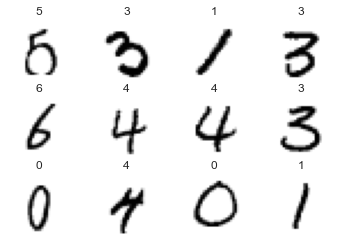

In [10]:
for sub in range(1, 13):
        plt.subplot(3,4, sub)
        i = np.random.randint(60000)

        plt.imshow(255 - X_train_images[i], cmap='gray')
        plt.title(y_train_labels[i]);
        plt.axis("off")

## Maak de images geschikt voor ML modellen

**OPDRACHT**: "reshape" de images naar een nieuwe data structuur met dimensies (#aantal_images, 28*28)

In [11]:
X_train_images_flatten = X_train_images.reshape((60000, 28*28))

In [12]:
X_train_images_flatten.shape

(60000, 784)

In [13]:
X_test_images_flatten = X_test_images.reshape((10000, 28*28))

In [14]:
X_test_images_flatten.shape

(10000, 784)

## k-Nearest Neighbours


Het is beter om in eerste instantie slechts een deel van de training set en de test set te gebruiken, bijvoorbeeld 10%.

Het trainen duurt niet lang, maar het voorspellen kan zeer rekenintensief zijn.

Gebruik %%timeit om deze bewering te controleren.

In [15]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')

**OPDRACHT**: train de kNN met fit() en pas het model toe met predict(). *Kies eerst 10% van de train set en test set.* Je mag dat later verruimen.

In [28]:
%%timeit
knn.fit(X_train_images_flatten[:6000,:], y_train_labels[:6000])

232 µs ± 7.02 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [31]:
%%timeit
y_predicted_labels  = knn.predict(X_test_images_flatten[:1000,:])
print(accuracy_score(y_test_labels[:1000], y_predicted_labels[:1000]))

0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
152 ms ± 5.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**OPDRACHT**: Hoe verhoudt de "training-tijd" zich tot de "test-tijd"?

In [36]:
0.000152 / 0.000232

0.6551724137931034

Herhaal hier even dezelfde code omdat variabelen binnen de %%timeit niet toegankelijk zijn buiten de %%timeit.

In [20]:
y_predicted_labels = knn.predict(X_test_images_flatten[:1000,:])
print(accuracy_score(y_test_labels[:1000], y_predicted_labels[:1000]))

0.919


Bepaal een verwarringsmatrix en plot deze matrix als heatmap.

In [21]:
cm = confusion_matrix(y_test_labels[:1000], y_predicted_labels[:1000])

print(cm)

[[ 83   0   0   0   0   0   2   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  2   4  98   0   1   0   2   7   2   0]
 [  0   1   0  98   0   2   2   2   0   2]
 [  0   2   0   0  98   0   1   1   0   8]
 [  1   1   0   0   1  81   0   0   2   1]
 [  2   0   0   0   1   0  84   0   0   0]
 [  0   6   0   0   1   1   0  89   0   2]
 [  2   1   0   4   1   1   2   0  74   4]
 [  0   0   0   0   2   0   0   2   2  88]]


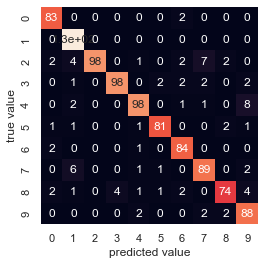

In [22]:
sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Wat valt je op?

**antwoord:**
Zo heeft het de 2 keer 7 verward voor een 2. Of dat het de nul 2 keer heeft verward voor een 6. Of dat het bijvoorbeeld 4 keer de 8 heeft verward met een 3.

## Toon 12 voorbeelden van fouten van het model

Ik bepaal eerst welke cijfers fout zijn gecategoriseerd.

In [23]:
mistakes =  y_test_labels[:1000]!=y_predicted_labels[:1000]

Ik bekijk een aantal voorbeelden.

In [24]:
mistakes[:100]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False])

En bepaal hoeveel fouten er zijn:

In [25]:
np.count_nonzero(mistakes)

81

Ik wil hier alleen de fout gecategoriseerde cijfers plotten.

Op dit moment worden 12 willekeurige cijfers uit de *hele* test set gekozen.

**OPDRACHT**: schrijf de code om naar alleen **fout** geclassificeerde cijfers.

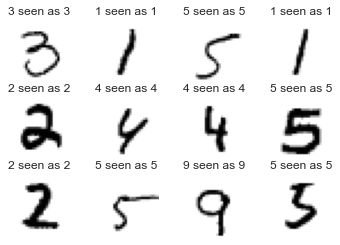

In [26]:
for sub in range(1,13):
        plt.subplot(3,4, sub)
        i = np.random.randint(1000)
        plt.axis("off")
        plt.imshow(255 - X_test_images[i,:,:], cmap='gray')
        predicted_number = y_predicted_labels[i]
        actual_number = y_test_labels[i]
        plt.title('{0} seen as {1}'.format(actual_number, predicted_number))


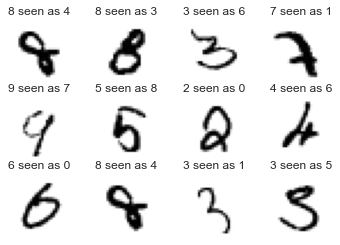

In [35]:
for sub in range(1,13):
    plt.subplot(3,4, sub)
    while True:
        i = np.random.randint(1000)
        predicted_number = y_predicted_labels[i]
        actual_number = y_test_labels[i]
        if predicted_number!=actual_number:
            plt.imshow(255 - X_test_images[i,:,:], cmap='gray')
            plt.axis("off")
            plt.title('{0} seen as {1}'.format(actual_number, predicted_number))
            break
            
        